# IRIS Dataset Exploratory Data Analysis (EDA)

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set_style("whitegrid")

# Downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")

# Find how many data-points and features are there?
print(iris.shape)

(150, 5)


In [2]:
# Check the head of the iris DataFrame
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Find the column names in our dataset
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
# Find how many flowers for each species are present?
print(iris["species"].value_counts())

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64


**Note:** Iris is a balanced dataset as the number of data points for every class is 50.

# 2-D Scatter Plot

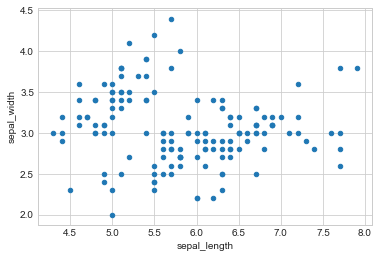

In [5]:
# Create 2-D scatter plot:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

**Note:** We cannot make much sense out it. Let's color the points by thier class-label/flower-type.

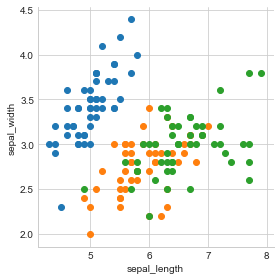

In [6]:
# Create 2-D Scatter plot with color-coding for each flower type/class.
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend

plt.show()

**Note:** Notice that the Setosa points can be easily seperated from Versicolor and Virginica by drawing a line. But Versicolor and Virginica data points cannot be easily seperated.

#  Pair-plot

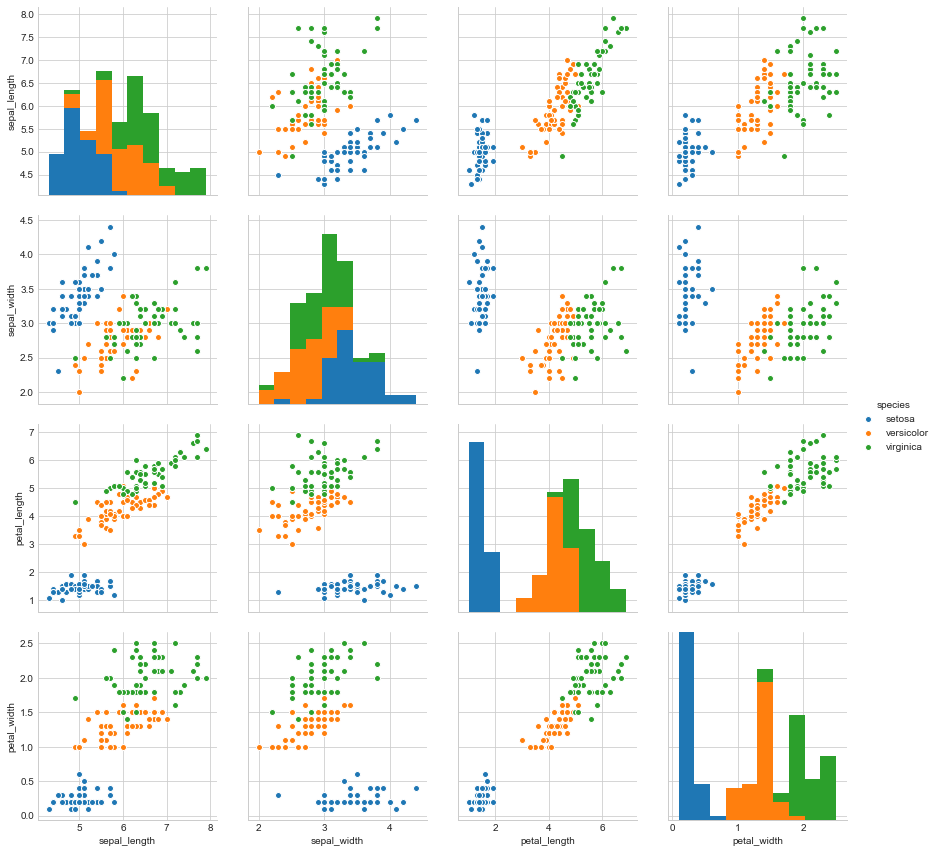

In [7]:
# Create a pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()

**Note:** Petal_length and petal_width are the most useful features to identify various flower types. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

# Histogram, PDF, CDF

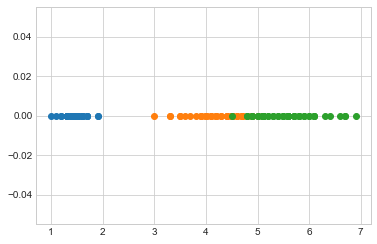

In [8]:
# Create 1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]

#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()

**Note:** As it is seen it is very hard to make sense as points are overlapping a lot.

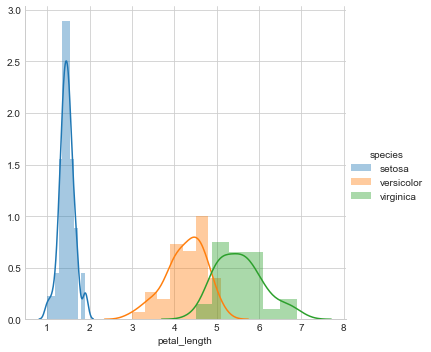

In [9]:
# Create a distplot of petal_length with color-coding for each flower type/class.
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

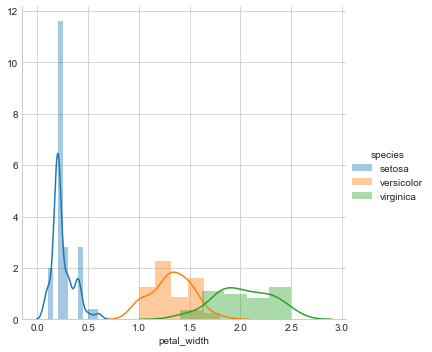

In [10]:
# Create a distplot of petal_width with color-coding for each flower type/class.
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

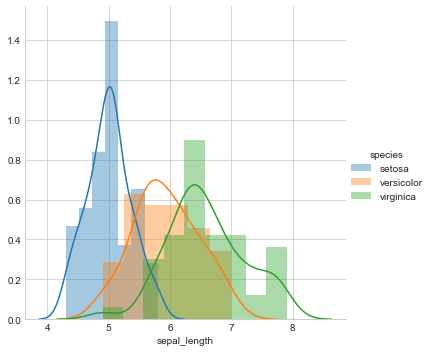

In [11]:
# Create a distplot of sepal_length with color-coding for each flower type/class.
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

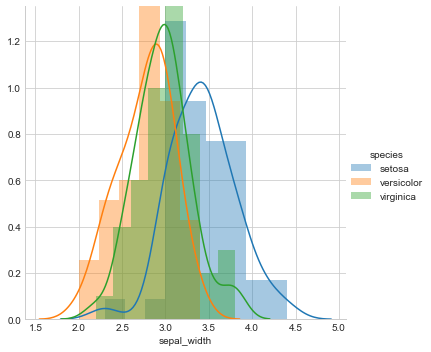

In [12]:
# Create a distplot of sepal_width with color-coding for each flower type/class.
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


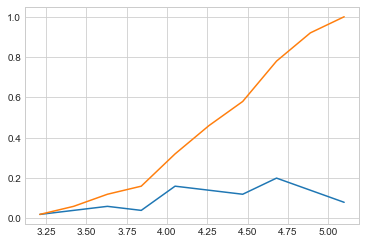

In [13]:
# Let's visually see what percentage of versicolor flowers have a petal_length of less than 5?
# Plot PDF (Probability Density Function) and CDF (Cumulative Density Function) of petal_length
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show()

**Observation:** As wee see from the CDF almost petal_length of 95% of the versicolor flowers is less than 5.  

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


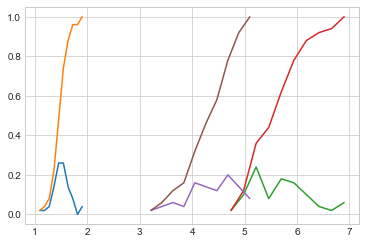

In [14]:
# Plots of CDF of petal_length for various types of flowers.
# setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
print()

# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
print()

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

# Mean, Variance and Std-dev

In [15]:
## Mean, Variance, Std-deviation,  
# Mean
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

# Std-deviation
print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

# Mean with an outlier.
# print(np.mean(np.append(iris_setosa["petal_length"],50)));

Means:
1.4620000000000002
5.552
4.26

Std-dev:
0.17191858538273286
0.5463478745268441
0.4651881339845204


# Median, Percentile, Quantile, IQR, MAD

In [16]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))

print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

#Median with an outlier
#print(np.median(np.append(iris_setosa["petal_length"],50)));


Medians:
1.5
5.55
4.35

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8


# Box plot and Whiskers

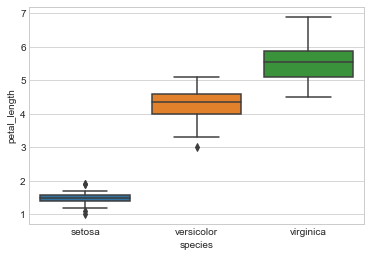

In [17]:
# Create a Box-plot with whiskers
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# Violin plots

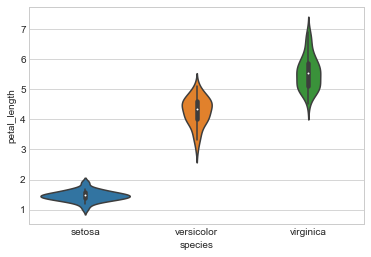

In [18]:
# Create a Violin plot
sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# Multivariate probability density, contour plot.

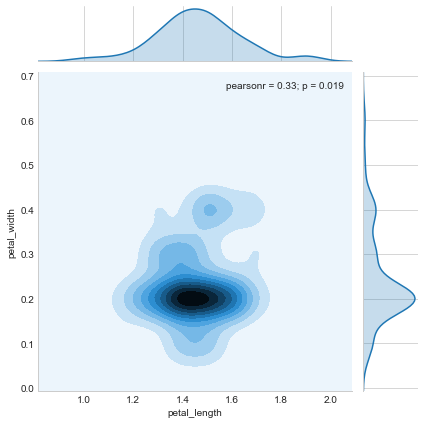

In [19]:
# Create 2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();